In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

/home/souvik/anaconda3/envs/reinforcement-env/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
## prepare data

x_numpy, y_numpy = datasets.make_regression(n_samples=100,
n_features=1, noise=20,random_state=1)

x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [3]:
y.shape

torch.Size([100])

In [4]:
y = y.view(y.shape[0],1)

In [5]:
y.shape

torch.Size([100, 1])

In [6]:
x.shape

torch.Size([100, 1])

In [7]:
n_samples,n_features = x.shape

In [8]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size,output_size)

In [9]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01 )

In [10]:
num_epochs = 100

for epoch in range(num_epochs):
    # forward pass
    y_predicted = model(x)
    # backward pass
    loss = criterion(y_predicted,y)
    #update
    loss.backward()
    optimizer.step()

    optimizer.zero_grad()

    if(epoch+1)% 10==0:
        print(f'epoch{epoch+1}, loss = {loss.item():.4f}')

epoch10, loss = 4302.1890
epoch20, loss = 3211.0410
epoch30, loss = 2421.7112
epoch40, loss = 1850.0969
epoch50, loss = 1435.7306
epoch60, loss = 1135.0760
epoch70, loss = 916.7411
epoch80, loss = 758.0609
epoch90, loss = 642.6526
epoch100, loss = 558.6600


/home/souvik/anaconda3/envs/reinforcement-env/lib/python3.8/site-packages/torch/autograd/__init__.py:173: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 803: system has unsupported display driver / cuda driver combination (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484657607/work/c10/cuda/CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


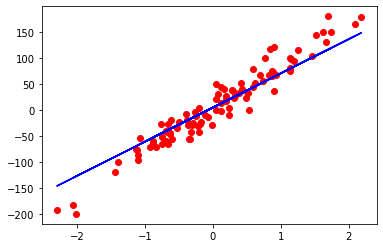

In [11]:
#plot

predicted = model(x).detach() # tensor with gradient as false
plt.plot(x_numpy,y_numpy,'ro')
plt.plot(x_numpy,predicted,'b')
plt.show()